# CS381/780 Data Analytics Final Project

### Due on 12/13/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on the follwoing 

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

### Your task in the final project is build the best predictive model to classify if a loan will carry good or bad credit risks. The focus should be in identifying bad risk loans

* Try at least two of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* Answer the question whether past credit history will be an important factor or not.

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations

In [3]:
df = pd.read_csv("german_credit_modified.csv")
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


In [4]:
# df['Risk'] = df['Risk'].apply(lambda x: 'good' if x == 1 else 'bad')

In [5]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


<AxesSubplot:xlabel='Risk', ylabel='count'>

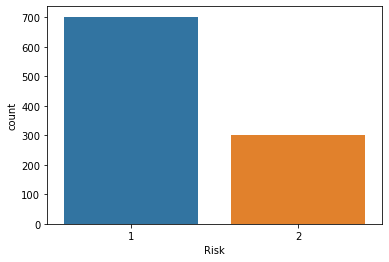

In [6]:
sns.countplot(df['Risk'])

***The original dataset is hard to understand. So we are going to decode the fields to an easier to understand format***

In [7]:
decode_map = {'A11': 'little', 'A12': 'moderate', 'A13': 'rich', 'A14': 'No Account',
              'A30': 'paid back', 'A31': 'paid back', 'A32': 'paid back', 
              'A33': 'delay', 'A34': 'default',
              'A40' : 'car',
              'A41' : 'car',
              'A42' : 'furniture/equipment',
              'A43' : 'radio/television',
              'A44' : 'domestic appliances',
              'A45' : 'repairs',
              'A46' : 'education',
              'A47' : 'vacation',
              'A48' : 'retraining',
              'A49' : 'business',
              'A410' : 'others',
              'A61' :  'little',
              'A62' :  'moderate',
              'A63' :  'quite rich',
              'A64' :  'rich',
              'A65' :  'unknown',
              
              'A71' : 'unemployed',
              'A72' : '< 1 year',
              'A73' : '1 to <4 years',
              'A74': '4 to <7 years',
              'A75' : '>= 7 years',

              'A91' : 'male   : divorced/separated',
              'A92' : 'female : divorced/separated/married',
              'A93' : 'male   : single',
              'A94' : 'male   : married/widowed',
              'A95' : 'female : single',
              
              'A101' : 'none',
              'A102' : 'co-applicant',
              'A103' : 'guarantor',

              'A121' : 'real estate',
              'A122' : 'life insurance',
              'A123' : 'car',
              'A124' : 'no property',
              
              'A141' : 'bank',
              'A142' : 'stores',
              'A143' : 'none',
              'A151' : 'rent',
              'A152' : 'own',
              'A153' : 'for free',


              'A171' : 'unemployed/non-resident',
              'A172' : 'unskilled/resident',
              'A173' : 'skilled employee',
              'A174' : 'management/highly qualified employee',
            
             }

In [8]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: decode_map[x] if x in decode_map.keys() else x)

In [9]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,1
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,2
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,1
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,1
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,2


In [10]:
df.shape

(1003, 19)

***Now you can start from this dataset***

### Good Luck !!!

Show all your work below
# 1.1 EDA-chekcing missing values

In [11]:
df[df.isnull().any(axis=1)]

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
988,rich,42,NaN,business,6289,little,< 1 year,2,male : divorced/separated,none,1,life insurance,33,none,own,2,skilled employee,1,1
1002,little,45,paid back,radio/television,1845,little,1 to <4 years,4,male : single,none,4,no property,23,none,for free,1,NaN,1,2


In [12]:
df.dropna(inplace=True)
df.shape

(1001, 19)

In [13]:
df.isnull().any()

Checking Account            False
Duration                    False
Credit History              False
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                         False
Liable                      False
Risk                        False
dtype: bool

# 1.2 EDA--Check if there is any outliers using boxplot for all numberical data

In [14]:
df.describe()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,20.888112,3269.209790,2.971029,2.844156,35.780220,1.407592,1.154845,1.299700
std,12.061984,2822.069274,1.119893,1.103489,13.571501,0.577670,0.361938,0.458356
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.000000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,270.000000,4.000000,2.000000,2.000000


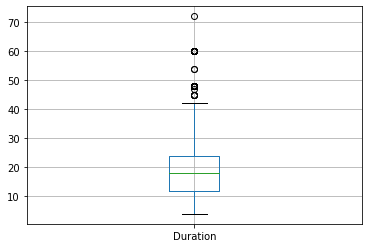

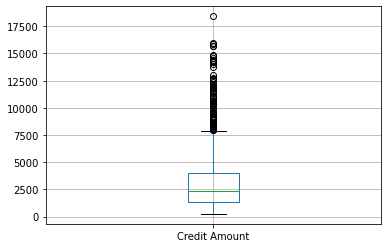

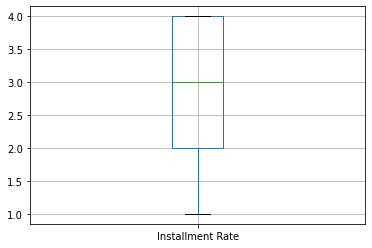

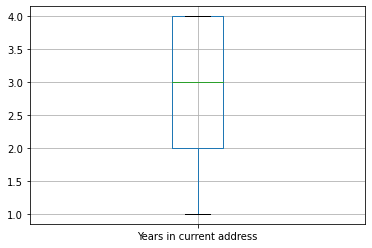

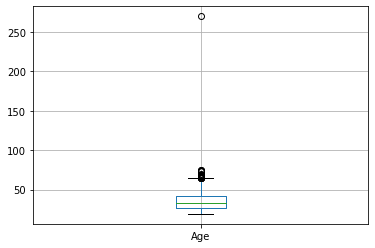

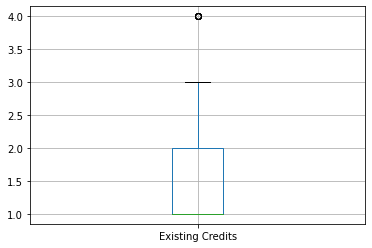

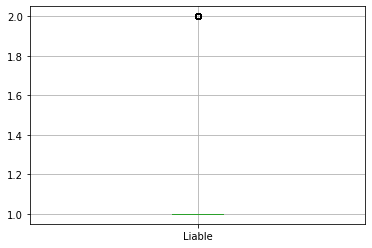

In [15]:
df.boxplot(column=['Duration'])
plt.show()
df.boxplot(column=['Credit Amount'])
plt.show()
df.boxplot(column=['Installment Rate'])
plt.show()
df.boxplot(column=['Years in current address'])
plt.show()
df.boxplot(column=['Age'])
plt.show()
df.boxplot(column=['Existing Credits'])
plt.show()
df.boxplot(column=['Liable'])
plt.show()

# 1.3 EDA-removing outliers(before)

In [16]:
df = df[df.Duration<55]
df = df[df['Credit Amount']<14000]
df = df[df['Age']<100]

# 1.4 EDA-removing outliers(after)

In [17]:
df.describe()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk
count,977.000000,977.000000,977.00000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,20.194473,3068.308086,2.98260,2.840328,35.492323,1.412487,1.157625,1.292733
std,10.984856,2449.800770,1.11744,1.104708,11.254607,0.580390,0.364576,0.455250
min,4.000000,250.000000,1.00000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1355.000000,2.00000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2273.000000,3.00000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3850.000000,4.00000,4.000000,42.000000,2.000000,1.000000,2.000000
max,54.000000,12976.000000,4.00000,4.000000,75.000000,4.000000,2.000000,2.000000


<AxesSubplot:>

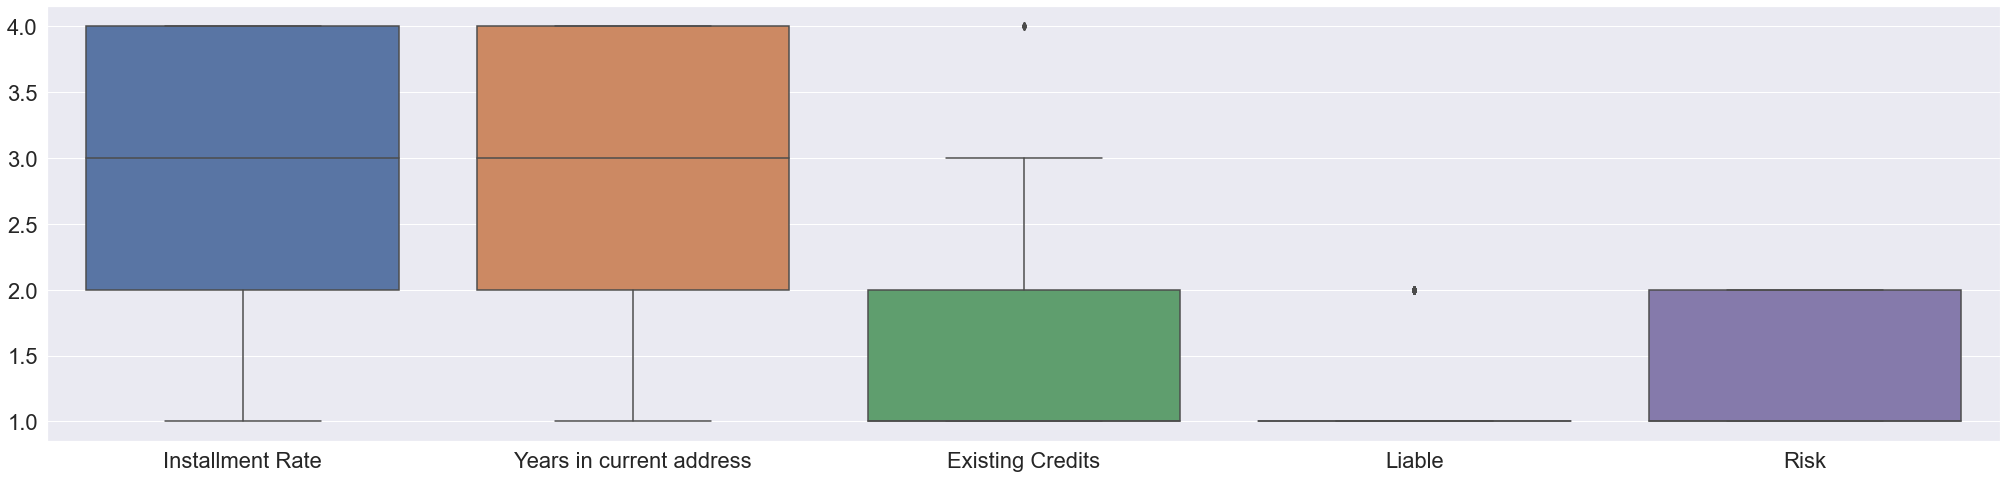

In [18]:
sns.set(rc={'figure.figsize':(35,8)},font_scale=2)
sns.boxplot(data=df.drop(['Credit Amount','Age','Duration'],axis=1))

<AxesSubplot:>

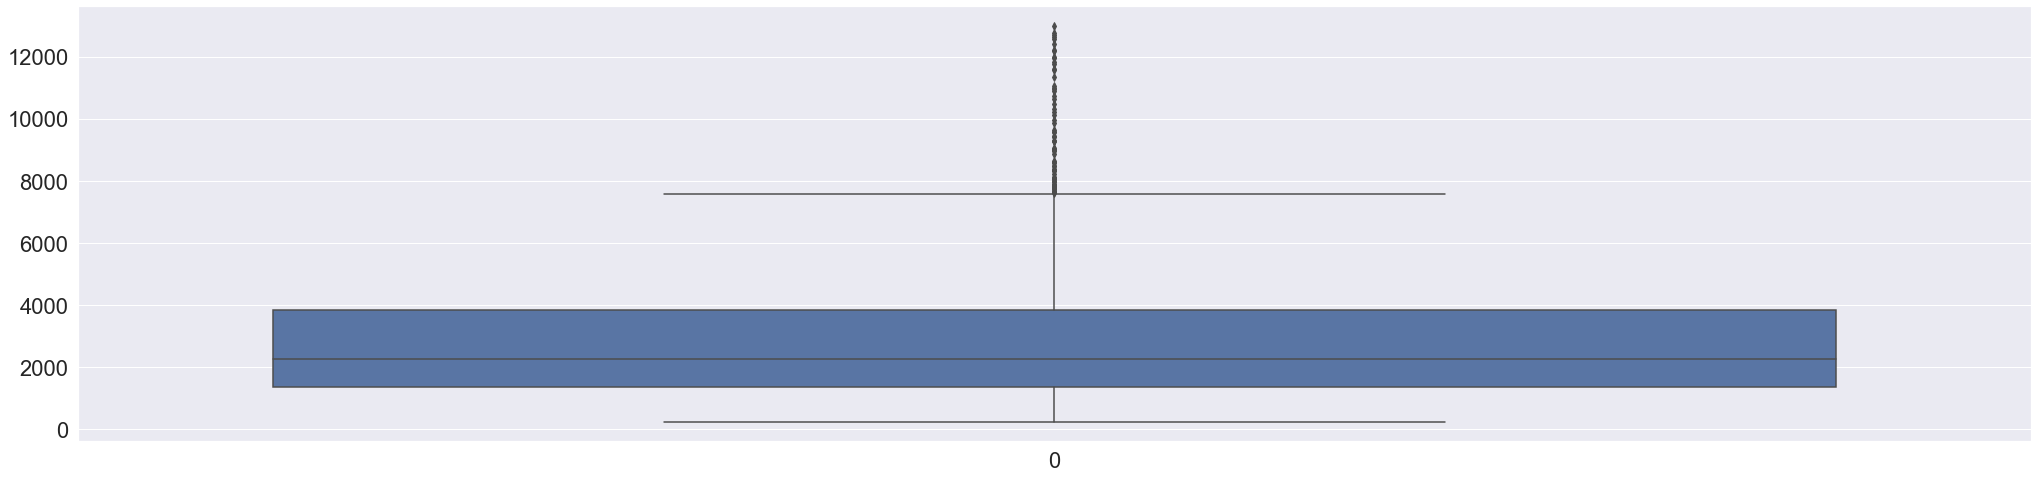

In [19]:
sns.set(rc={'figure.figsize':(35,8)},font_scale=2)
sns.boxplot(data=df['Credit Amount'])

<AxesSubplot:>

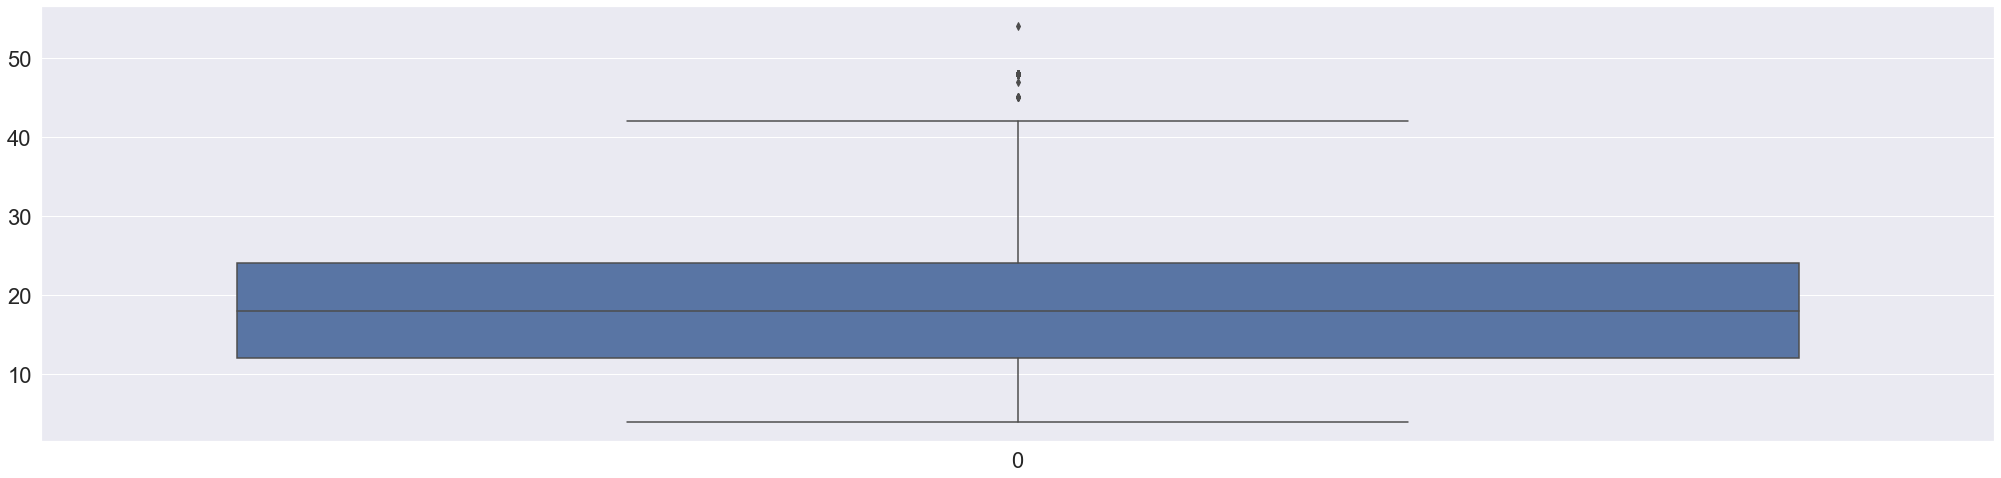

In [20]:
sns.set(rc={'figure.figsize':(35,8)},font_scale=2)
sns.boxplot(data=df['Duration'])

<AxesSubplot:>

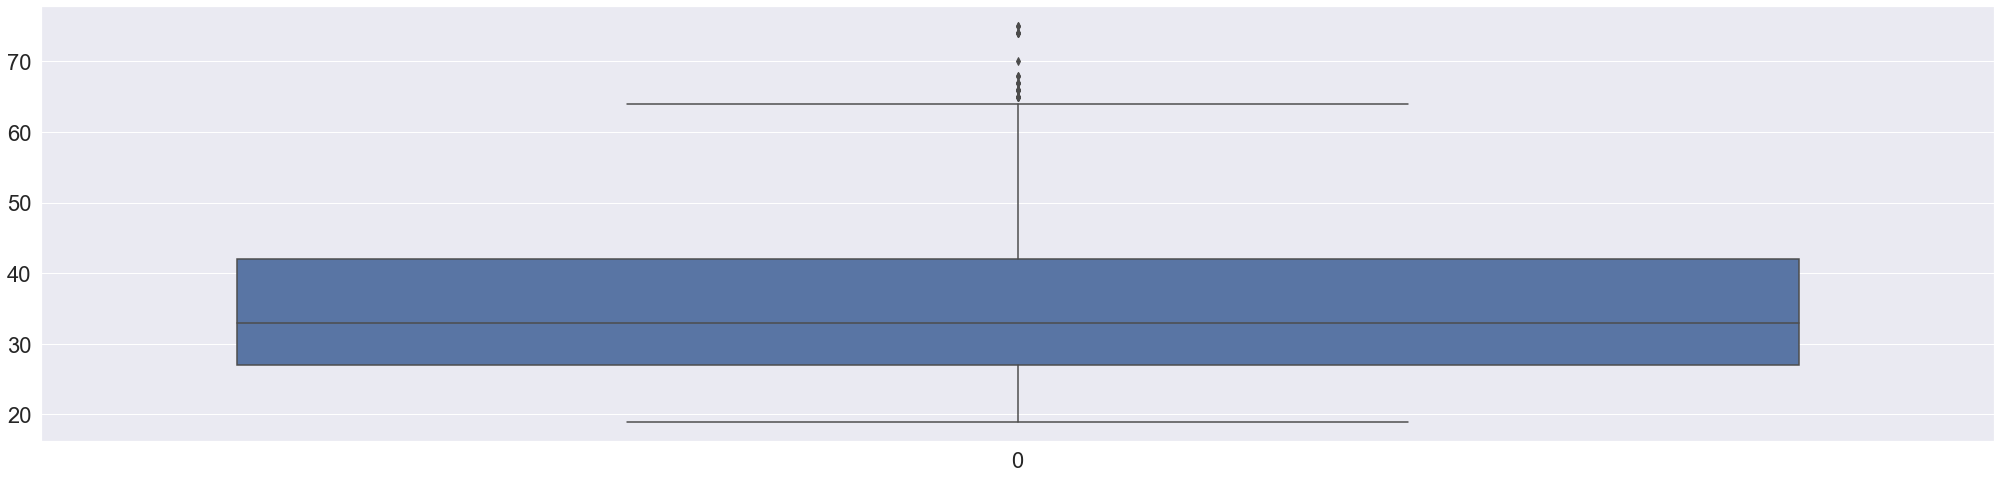

In [21]:
sns.set(rc={'figure.figsize':(35,8)},font_scale=2)
sns.boxplot(data=df['Age'])

# 2 performed basic exploration of relationship, with plots and graphs

In [22]:
# df['Risk'] = df['Risk'].apply(lambda x: 1 if x == 'good' else 0)
# print(df['Risk'])


## 2.1 correlation of all the factors among themselves¶

In [23]:
df.describe()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk
count,977.000000,977.000000,977.00000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,20.194473,3068.308086,2.98260,2.840328,35.492323,1.412487,1.157625,1.292733
std,10.984856,2449.800770,1.11744,1.104708,11.254607,0.580390,0.364576,0.455250
min,4.000000,250.000000,1.00000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1355.000000,2.00000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2273.000000,3.00000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3850.000000,4.00000,4.000000,42.000000,2.000000,1.000000,2.000000
max,54.000000,12976.000000,4.00000,4.000000,75.000000,4.000000,2.000000,2.000000


In [24]:
df.corr()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk
Duration,1.000000,0.605587,0.096434,0.023838,-0.045031,0.011511,-0.008685,0.205781
Credit Amount,0.605587,1.000000,-0.277308,0.020211,0.014054,0.055701,0.052198,0.122588
Installment Rate,0.096434,-0.277308,1.000000,0.045887,0.058933,0.015818,-0.078771,0.076488
Years in current address,0.023838,0.020211,0.045887,1.000000,0.259323,0.086849,0.042204,0.005432
Age,-0.045031,0.014054,0.058933,0.259323,1.000000,0.152086,0.123900,-0.104746
Existing Credits,0.011511,0.055701,0.015818,0.086849,0.152086,1.000000,0.108838,-0.038666
Liable,-0.008685,0.052198,-0.078771,0.042204,0.123900,0.108838,1.000000,0.005674
Risk,0.205781,0.122588,0.076488,0.005432,-0.104746,-0.038666,0.005674,1.000000


## 2.2 pairplot

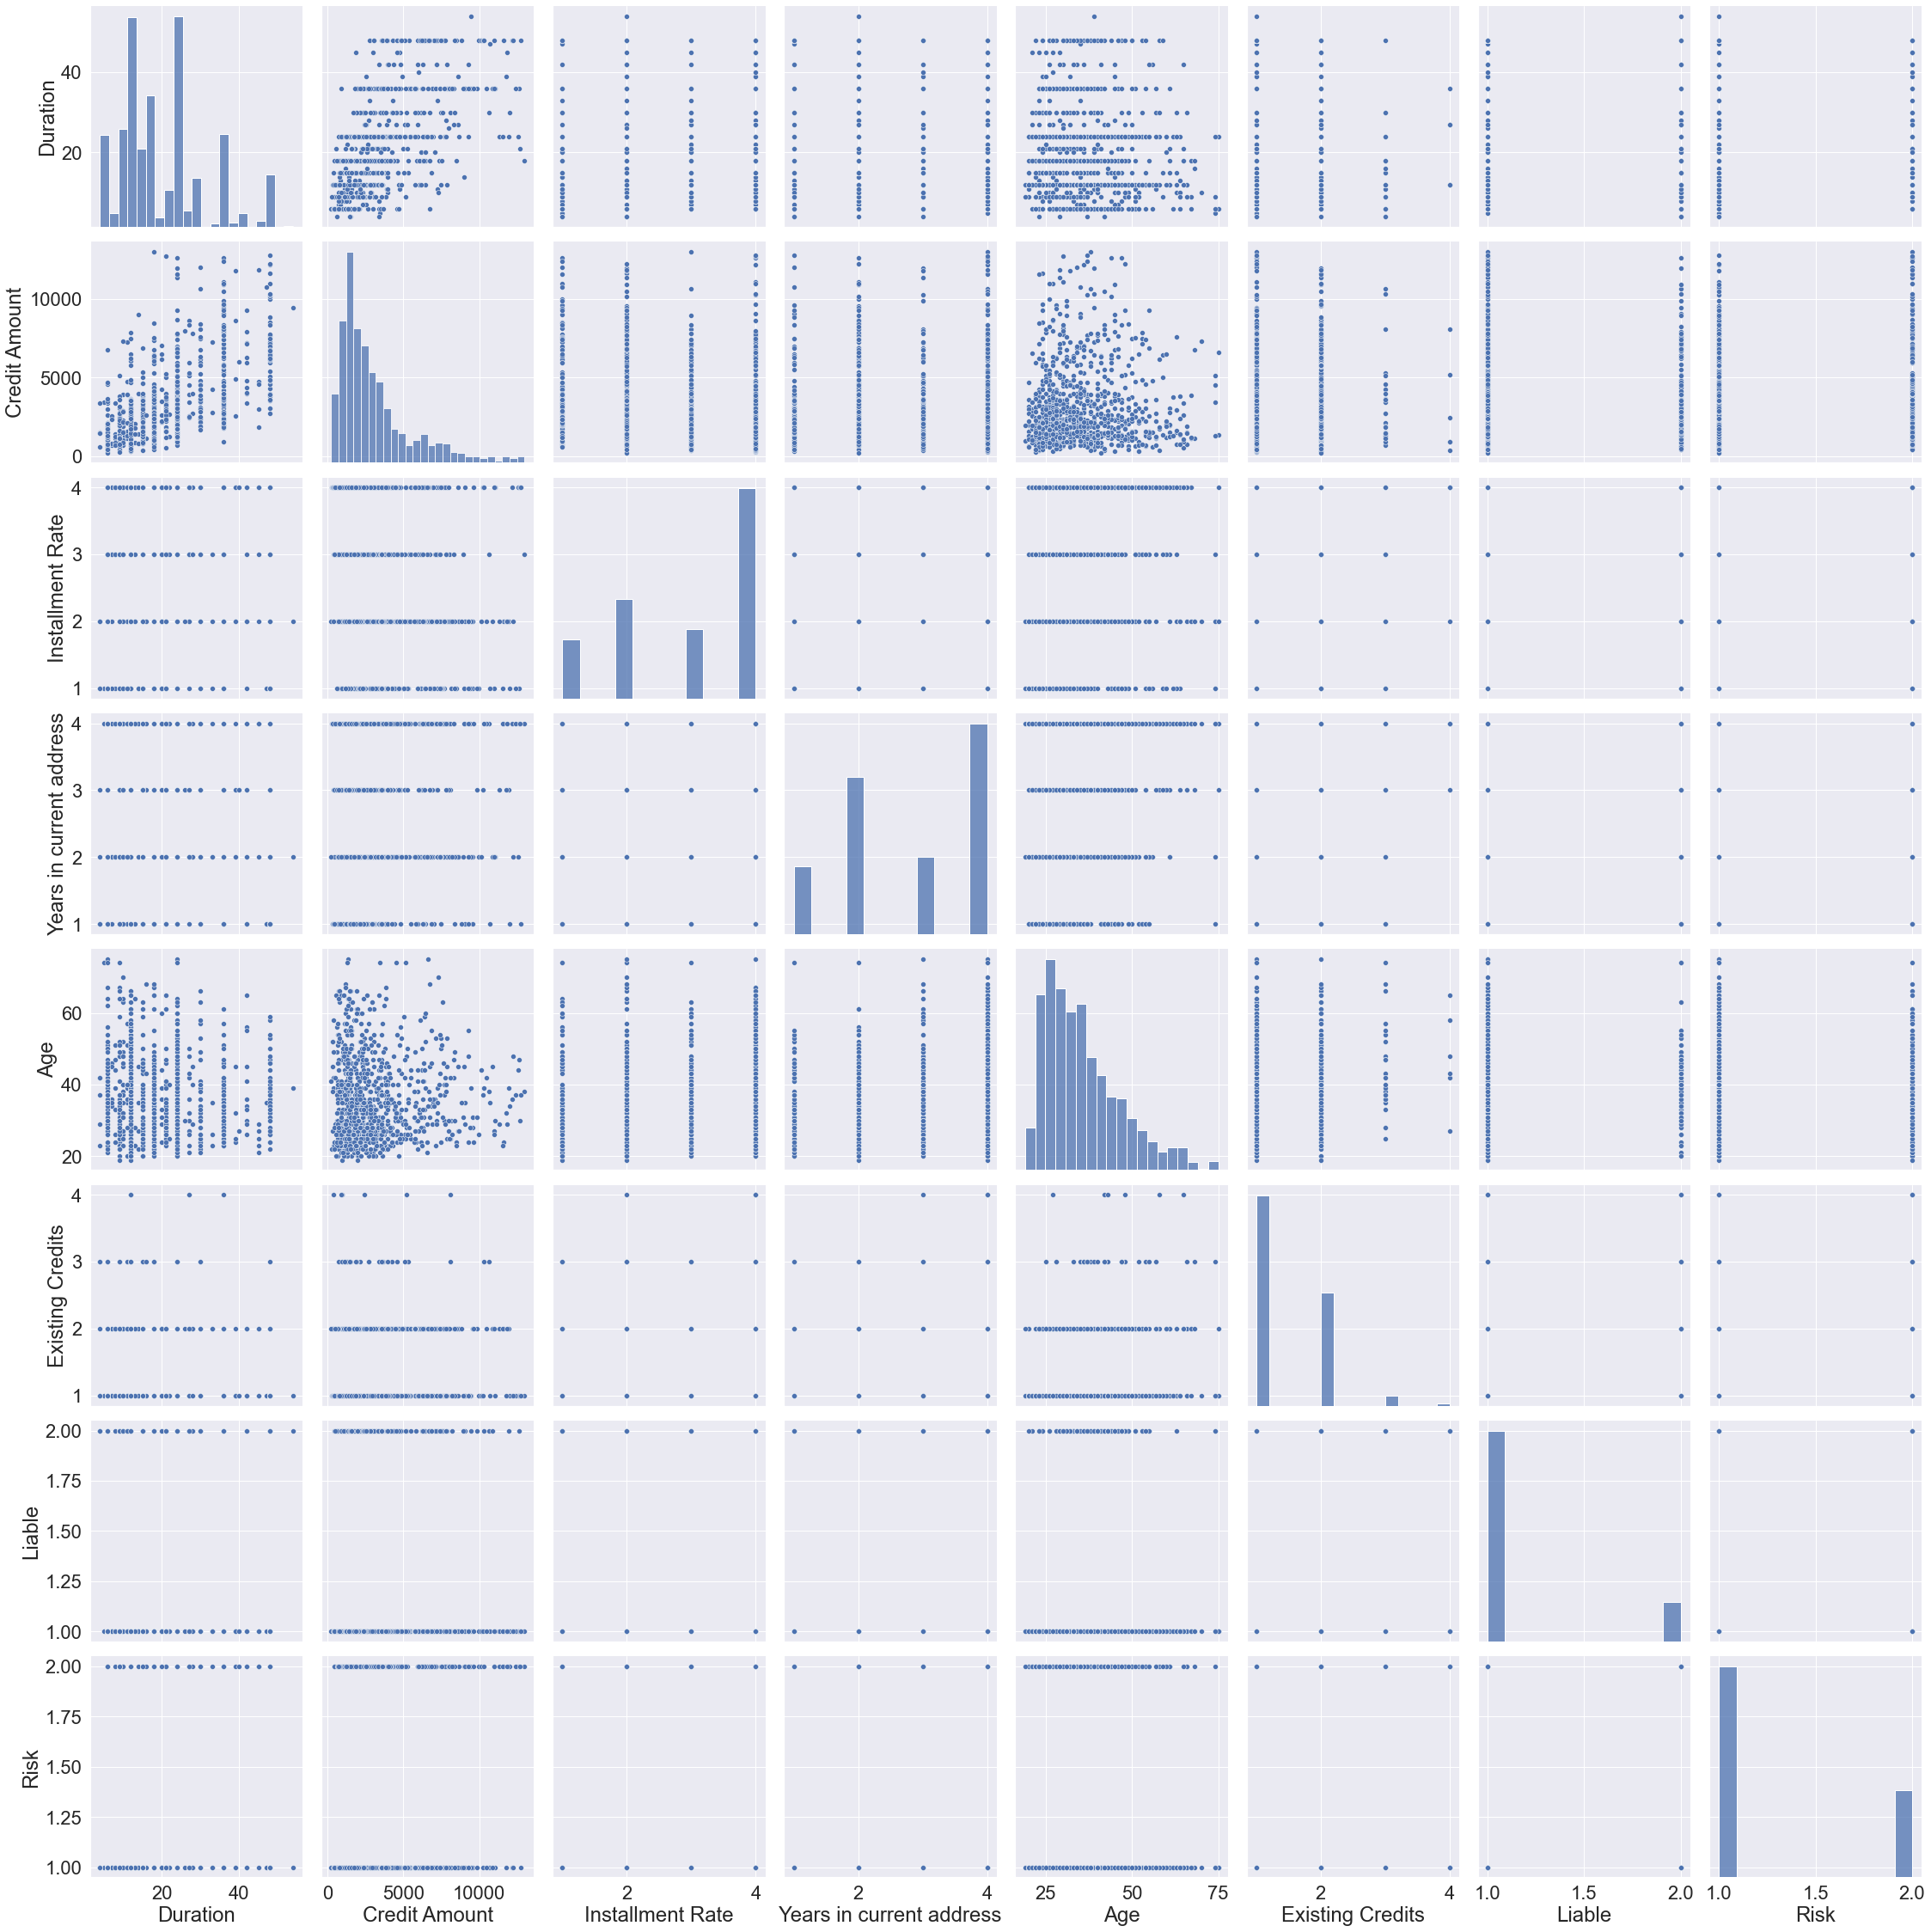

In [25]:
sns.pairplot(df,height=4)

##  2.3 heatmap

<AxesSubplot:>

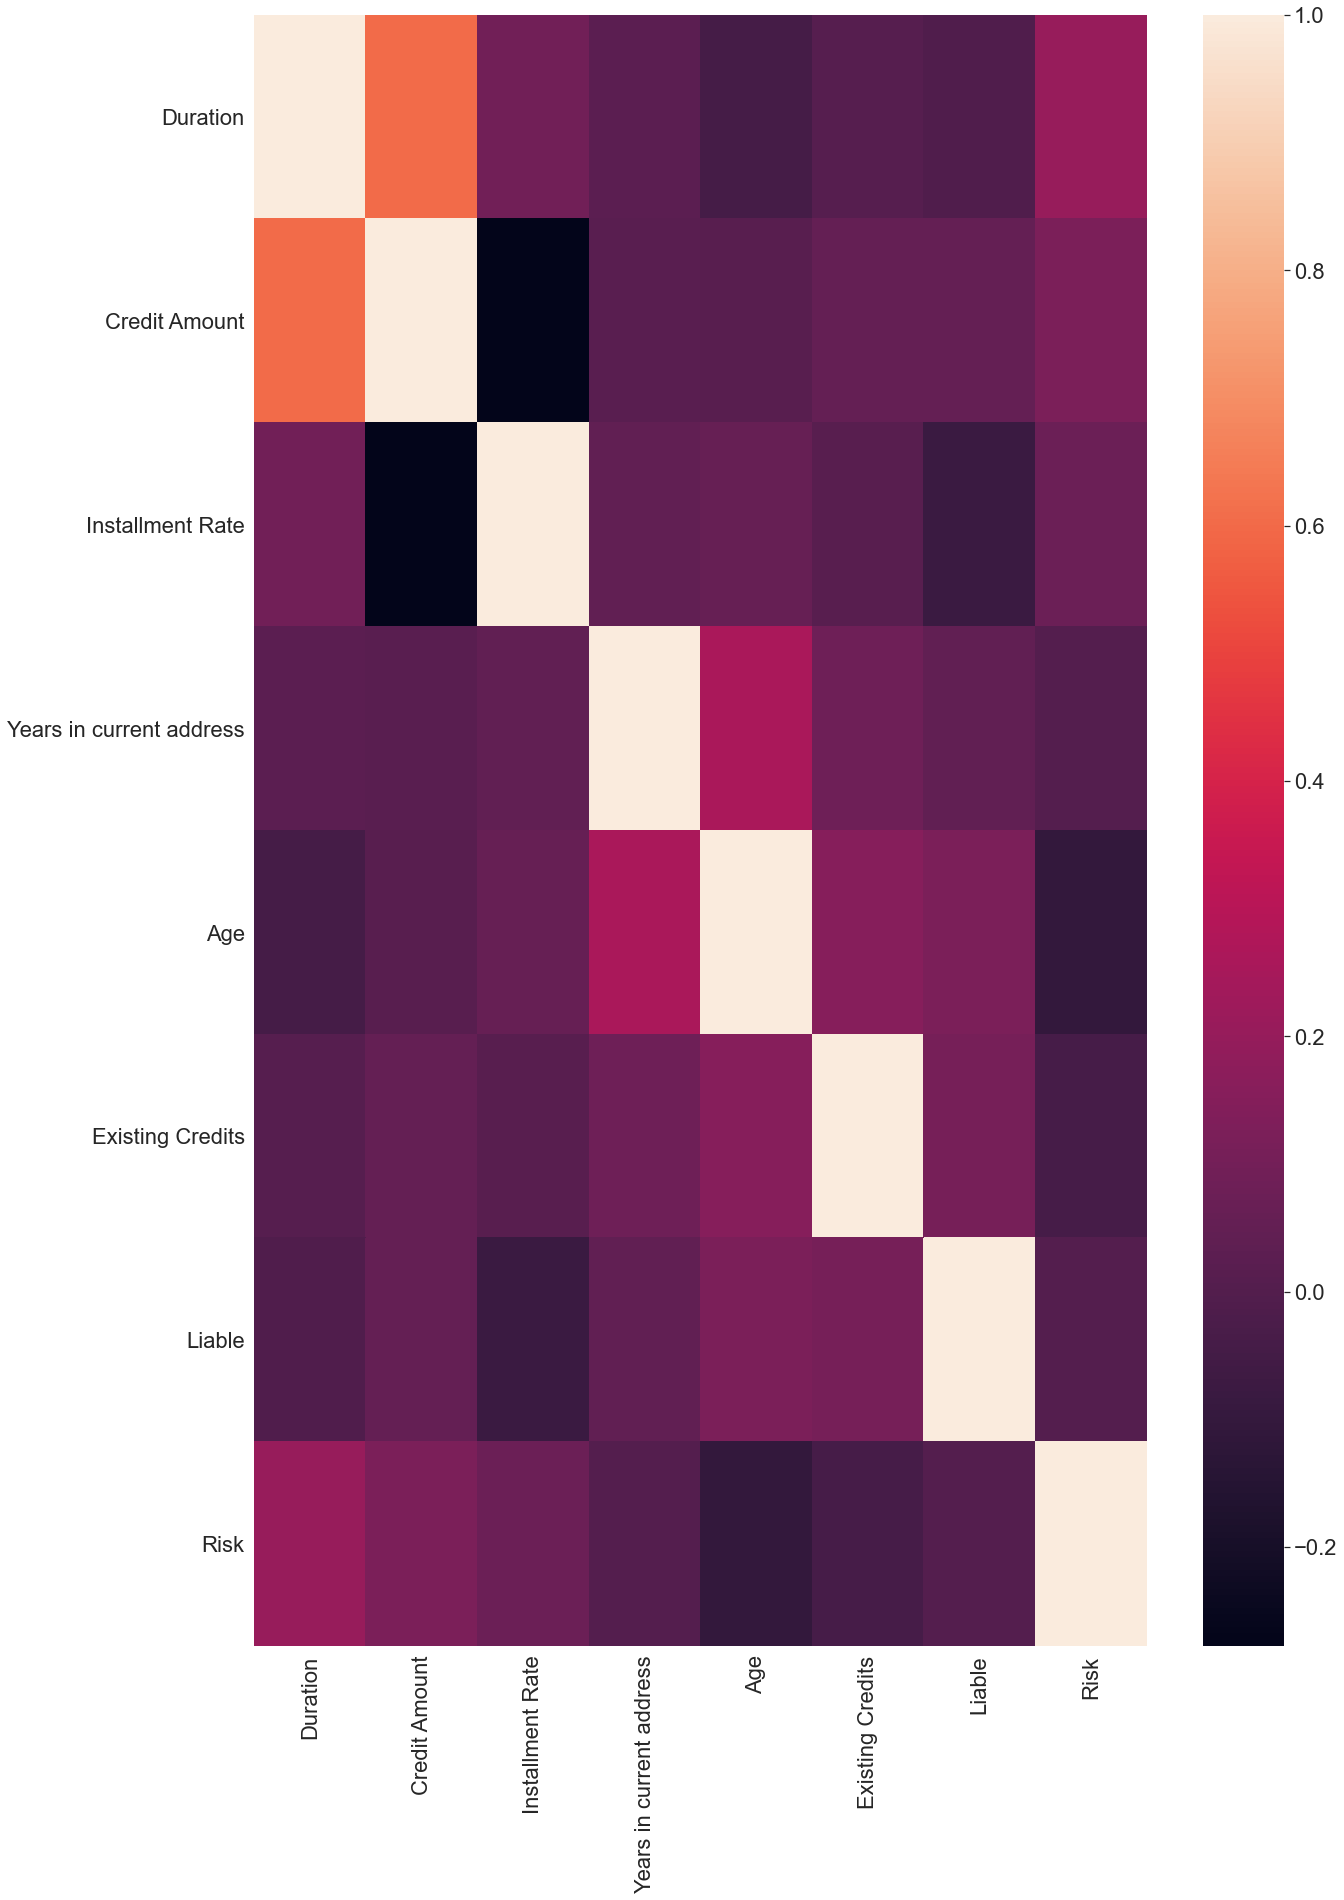

In [26]:
plt.figure(figsize = (20,30))
sns.set(font_scale=2)
sns.heatmap(df.corr())

# 2.4 comments  based on graphs

In [27]:
df[df.columns[:]].corr()['Risk'][:].sort_values()

Age                        -0.104746
Existing Credits           -0.038666
Years in current address    0.005432
Liable                      0.005674
Installment Rate            0.076488
Credit Amount               0.122588
Duration                    0.205781
Risk                        1.000000
Name: Risk, dtype: float64

From the heatmape and corrlation list, we can see that Age, Existing Credits columns which all have negative corrlation to the target column which is Risk.On the other hand, Duration column has relatively high corretion with Risk.

I also decided to choose the Credit Amount variable as the second variable,
This is because after Duration,Credit Amount is the sencnd highest correlation to Risk
The similar reason for Installment Rate varable

# 3 separated data set into training and testing

In [28]:
X = df.drop('Risk',axis=1)
Y = df['Risk']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [29]:
# get numerical features

numerical_features = ["Duration","Credit Amount","Installment Rate"]
numerical_df = df[numerical_features + ['Risk']]
numerical_df.head()


,Duration,Credit Amount,Installment Rate,Risk
0,6,1169,4,1
1,48,5951,2,2
2,12,2096,2,1
3,42,7882,2,1
4,24,4870,3,2


# 4 setup dummy variables to take care categorical variables
### I converted all categotical variables,but only picked some of them

In [30]:
new_Purpose = pd.get_dummies(df['Purpose'],drop_first=True)
new_Credit_History = pd.get_dummies(df['Credit History'],drop_first=True)
new_Checking_Account = pd.get_dummies(df['Checking Account'],drop_first=True)
new_Saving_Account = pd.get_dummies(df['Saving Account'],drop_first=True)
new_Employment_Status = pd.get_dummies(df['Employment Status'],drop_first=True)
new_Personal_Status = pd.get_dummies(df['Personal Status'],drop_first=True)
new_Guarantors = pd.get_dummies(df['Guarantors'],drop_first=True)
new_Property = pd.get_dummies(df['Property'],drop_first=True)
new_Installment_plans = pd.get_dummies(df['Installment plans'],drop_first=True)
new_Housing = pd.get_dummies(df['Housing'],drop_first=True)
new_Job = pd.get_dummies(df['Job'],drop_first=True)

new_Purpose.columns=['pur1','pur2','pur3','pur4','pur5','pur6','pur7','pur8']
new_Credit_History.columns=['cr_his1','cr_his2']
new_Checking_Account.columns=['cr_amo1','cr_amo2','cr_amo3']
new_Saving_Account.columns=['sv_amo1','sv_amo2','sv_amo3','sv_amo4']
new_Employment_Status.columns=['emp1','emp2','emp3','emp4']
new_Personal_Status.columns=['per1','per2','per3']
new_Guarantors.columns=['Gua1','Gua2']
new_Property.columns=['prop1','prop2','prop3']
new_Installment_plans.columns=['inst1','inst2']
new_Housing.columns=['hou1','hou2']
new_Job.columns=['job1','job2','job3']
# df['Job'].unique()
# print(df.columns)

df_with_Credit_History = pd.concat([numerical_df,new_Credit_History,new_Saving_Account,new_Checking_Account,new_Installment_plans,new_Personal_Status], axis=1)

df_without_Credit_History = pd.concat([numerical_df,new_Saving_Account,new_Checking_Account,new_Installment_plans,new_Personal_Status], axis=1)


df1=df_without_Credit_History
df2=df_with_Credit_History

X_train, X_test, Y_train, Y_test = train_test_split(df1.drop('Risk',axis=1), 
                                                    df1['Risk'], test_size=0.20, 
                                                    random_state=0)
df2.describe()


,Duration,Credit Amount,Installment Rate,Risk,cr_his1,cr_his2,sv_amo1,sv_amo2,sv_amo3,sv_amo4,cr_amo1,cr_amo2,cr_amo3,inst1,inst2,per1,per2,per3
count,977.000000,977.000000,977.00000,977.000000,977.000000,977.000000,977.000000,977.000000,977.00000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,20.194473,3068.308086,2.98260,1.292733,0.085977,0.616172,0.101331,0.064483,0.04913,0.181167,0.275333,0.262027,0.064483,0.813715,0.048106,0.050154,0.093142,0.543501
std,10.984856,2449.800770,1.11744,0.455250,0.280474,0.486566,0.301921,0.245737,0.21625,0.385354,0.446911,0.439962,0.245737,0.389536,0.214101,0.218373,0.290781,0.498359
min,4.000000,250.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1355.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,2273.000000,3.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,24.000000,3850.000000,4.00000,2.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,54.000000,12976.000000,4.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5 normalize numerical features if needed
## I did not do the normalization here. 

In [31]:

# numerical_features = df1[["Duration","Credit Amount","Installment Rate","Years in current address", "Age", "Existing Credits", "Liable"]]
# scaler = StandardScaler()
# normalized_df = scaler.fit_transform(numerical_features)
# normalized_df = pd.DataFrame(normalized_df, index = df.index, columns = ["Duration","Credit Amount","Installment Rate","Years in current address", "Age", "Existing Credits", "Liable"] )
# normalized_df.describe()
# sns.set(rc={'figure.figsize':(35,8)},font_scale=2)
# sns.boxplot(data=normalized_df)


# 6 tried at least two models and checked their model performance

### dataset without credit historu

### 6.1 Logistic Regression model

In [32]:
model_1 = LogisticRegression()
model_1.fit(X_train,Y_train)
predictions = model_1.predict(X_test)
print(classification_report(Y_test,predictions,labels=[1,2],target_names=["good","bad"]))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

        good       0.87      0.81      0.84       156
         bad       0.42      0.53      0.47        40

    accuracy                           0.76       196
   macro avg       0.64      0.67      0.65       196
weighted avg       0.78      0.76      0.76       196

0.7551020408163265


### 6.2 Decision Tree model
(  the value of f1-score with max depth = 4  has a better performance after tests )

In [33]:
model_2 =  DecisionTreeClassifier(max_depth=4, criterion='entropy')
model_2.fit(X_train,Y_train)
predictions = model_2.predict(X_test)
print(classification_report(Y_test,predictions,labels=[1,2],target_names=["good","bad"]))
print(accuracy_score(Y_test, predictions))

# feature_names = df1.drop('Risk', axis=1).columns
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(model_2,feature_names=feature_names, filled=True)


              precision    recall  f1-score   support

        good       0.86      0.89      0.88       156
         bad       0.51      0.45      0.48        40

    accuracy                           0.80       196
   macro avg       0.69      0.67      0.68       196
weighted avg       0.79      0.80      0.80       196

0.8010204081632653


## 6.3 naive_bayes model

In [34]:
from sklearn.naive_bayes import GaussianNB
model_3 = GaussianNB()
model_3.fit(X_train,Y_train)
predictions = model_3.predict(X_test)
print(classification_report(Y_test,predictions,labels=[1,2],target_names=["good","bad"]))
print(accuracy_score(Y_test, predictions))


              precision    recall  f1-score   support

        good       0.86      0.74      0.80       156
         bad       0.35      0.55      0.43        40

    accuracy                           0.70       196
   macro avg       0.61      0.64      0.61       196
weighted avg       0.76      0.70      0.72       196

0.6989795918367347


### VS Dataset with credit history

In [35]:
df1=df_without_Credit_History
df2=df_with_Credit_History
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop('Risk',axis=1), 
                                                    df2['Risk'], test_size=0.20, 
                                                    random_state=0)



In [36]:
# Logistic Regression model
model_1.fit(X_train,Y_train)
predictions = model_1.predict(X_test)
print(classification_report(Y_test,predictions,labels=[1,2],target_names=["good","bad"]))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

        good       0.87      0.83      0.85       156
         bad       0.43      0.50      0.47        40

    accuracy                           0.77       196
   macro avg       0.65      0.67      0.66       196
weighted avg       0.78      0.77      0.77       196

0.7653061224489796


In [37]:
# Decision Tree model
model_2.fit(X_train,Y_train)
predictions = model_2.predict(X_test)
print(classification_report(Y_test,predictions,labels=[1,2],target_names=["good","bad"]))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

        good       0.86      0.89      0.88       156
         bad       0.51      0.45      0.48        40

    accuracy                           0.80       196
   macro avg       0.69      0.67      0.68       196
weighted avg       0.79      0.80      0.80       196

0.8010204081632653


In [38]:
# naive_bayes model
model_3.fit(X_train,Y_train)
predictions = model_3.predict(X_test)
print(classification_report(Y_test,predictions,labels=[1,2],target_names=["good","bad"]))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

        good       0.88      0.71      0.78       156
         bad       0.35      0.62      0.45        40

    accuracy                           0.69       196
   macro avg       0.62      0.67      0.62       196
weighted avg       0.77      0.69      0.72       196

0.6887755102040817


# 7 performed cross-validations (using dataset without credit history )

In [39]:
def ten_fold_Cross_Validation(model_instance):
    accuracy = []
    report = []
    sum=0
    average=0
    for i in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(df1.drop('Risk',axis=1), 
                                                            df1['Risk'], test_size=0.2, random_state = random.randint(1,1000))
        model = model_instance
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy.append(accuracy_score(Y_test, predictions))
        print('Trial {}, #Accuracy: {}'.format(i,accuracy[i]))
        sum+=accuracy_score(Y_test, predictions)
        if i==9:
            average=sum/10
            print("************************************************************************")
            print(' average accuacy socre: {}'.format(average))
        
        

    rdf = pd.DataFrame( {'Trial': range(10), 'Accuracy Score': accuracy})
    rdf.plot.bar(x='Trial', y='Accuracy Score',figsize=(20, 10))
    plt.xticks(rotation=0)

## 7.1. Logistic Regression model (Testing data = no credit history)

Trial 0, #Accuracy: 0.7397959183673469
Trial 1, #Accuracy: 0.7653061224489796
Trial 2, #Accuracy: 0.75
Trial 3, #Accuracy: 0.6938775510204082
Trial 4, #Accuracy: 0.7346938775510204
Trial 5, #Accuracy: 0.7448979591836735
Trial 6, #Accuracy: 0.7448979591836735
Trial 7, #Accuracy: 0.7704081632653061
Trial 8, #Accuracy: 0.75
Trial 9, #Accuracy: 0.7193877551020408
************************************************************************
 average accuacy socre: 0.7413265306122448


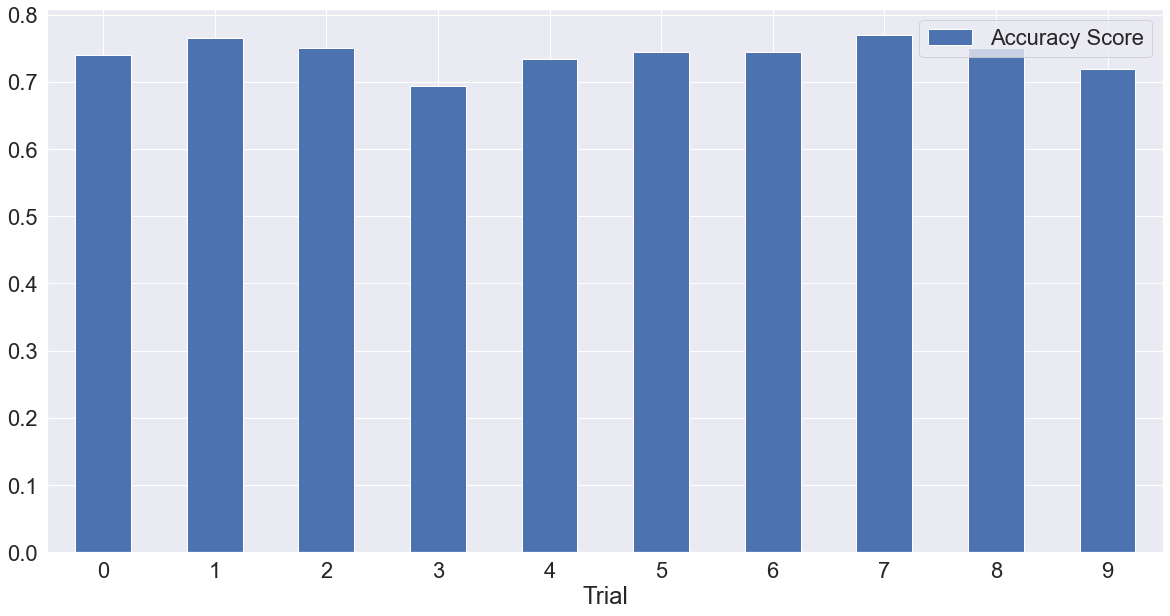

In [40]:
ten_fold_Cross_Validation(model_1)

In [41]:
print("Model_1 passed cross-validation since the accuracy scores are similar which are roughly 73% whose dataset = no credit history across the 10 different testing datasets.")


Model_1 passed cross-validation since the accuracy scores are similar which are roughly 73% whose dataset = no credit history across the 10 different testing datasets.


##  7.2 Decision Tree model 

Trial 0, #Accuracy: 0.7448979591836735
Trial 1, #Accuracy: 0.7551020408163265
Trial 2, #Accuracy: 0.7091836734693877
Trial 3, #Accuracy: 0.7193877551020408
Trial 4, #Accuracy: 0.75
Trial 5, #Accuracy: 0.7755102040816326
Trial 6, #Accuracy: 0.7448979591836735
Trial 7, #Accuracy: 0.7755102040816326
Trial 8, #Accuracy: 0.75
Trial 9, #Accuracy: 0.6938775510204082
************************************************************************
 average accuacy socre: 0.7418367346938777


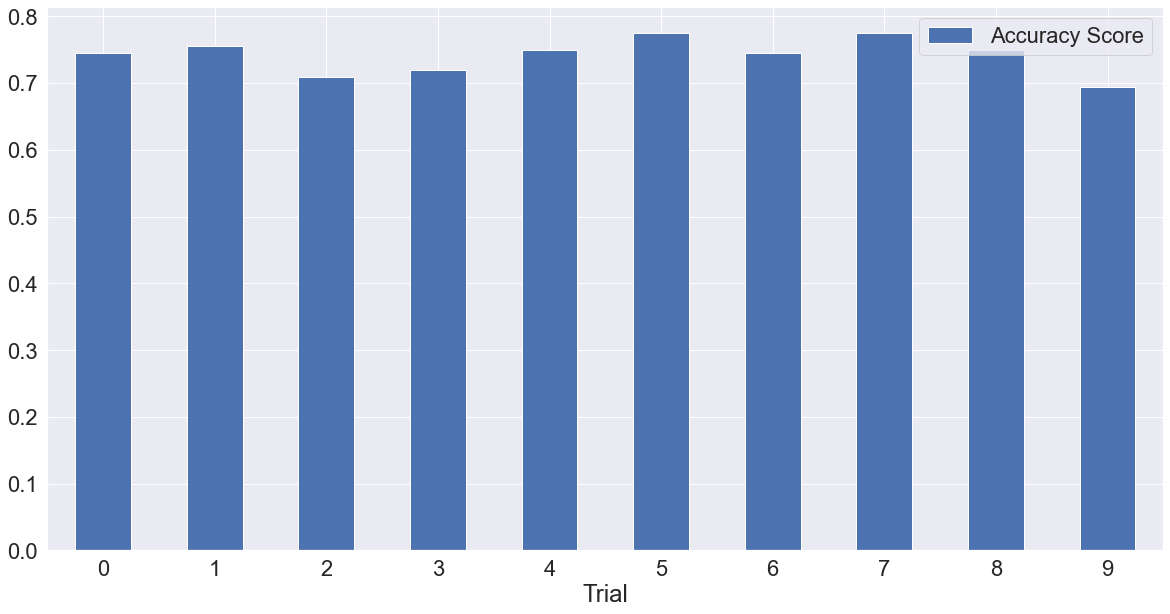

In [42]:
ten_fold_Cross_Validation(model_2)

In [43]:
print("Model_2 passed cross-validation since the accuracy scores are similar which are roughly 73% whose dataset = no credit history across the 10 different testing datasets.")


Model_2 passed cross-validation since the accuracy scores are similar which are roughly 73% whose dataset = no credit history across the 10 different testing datasets.


## 7.3 Naive Bayes model 

Trial 0, #Accuracy: 0.6836734693877551
Trial 1, #Accuracy: 0.7040816326530612
Trial 2, #Accuracy: 0.7448979591836735
Trial 3, #Accuracy: 0.7091836734693877
Trial 4, #Accuracy: 0.7193877551020408
Trial 5, #Accuracy: 0.7295918367346939
Trial 6, #Accuracy: 0.6377551020408163
Trial 7, #Accuracy: 0.7040816326530612
Trial 8, #Accuracy: 0.7244897959183674
Trial 9, #Accuracy: 0.7295918367346939
************************************************************************
 average accuacy socre: 0.708673469387755


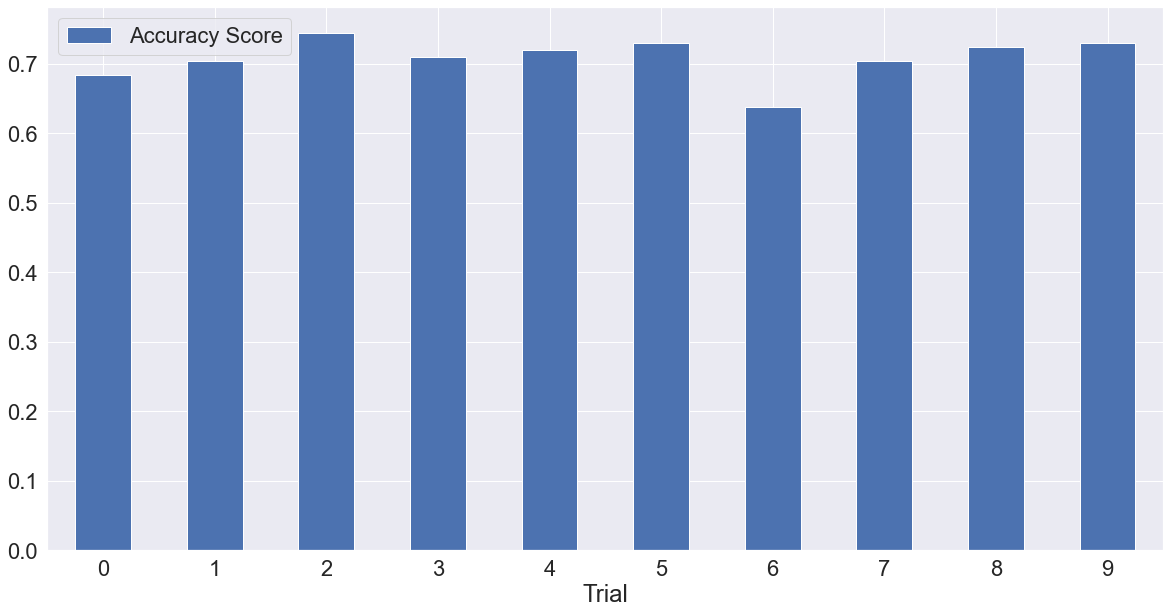

In [44]:
ten_fold_Cross_Validation(model_3)


In [45]:
print("Model_3 passed cross-validation since the accuracy scores are similar which are roughly 70% whose dataset = no credit history across the 10 different testing datasets.")


Model_3 passed cross-validation since the accuracy scores are similar which are roughly 70% whose dataset = no credit history across the 10 different testing datasets.


# 8 Comment on model results

###  8.1 Identify your best model that does not include the “Credit History” variable.


Overall, Decision Tree Model with max_depth=4, criterion='entropy' has slightly better performance based on accuracy score of all the models than other models without credit history among LogisticRegression Model,Decision Tree Model and Naive Bayes model.
********************************************************************

Decision Tree Model
f1 score = 0.88 (Risk = good) / 0.48 (Risk = bad)
accuracy score = 0.8

Logistic Regression Model
f1 score = 0.84 (Risk = good) / 0.45 (Risk = bad)
accuracy score = 0.75

Naive Bayes model
f1 score = 0.8 (Risk = good) / 0.43 (Risk = bad)
accuracy score = 0.69


###  8.2 Comment on model results


For Logistic Regression Model

f1 score = 0.84 (Risk = good) / 0.45 (Risk = bad)

The precision is 86%,which means we try to predict if a loan will carry good credit risks,the model makes a correct prediction 86% of the time.
The recall is 81% indicating that out of all Risk = good cases, we catched 81% of those cases in the prediction.

For case Risk = bad, precision is 42% meaning that when we try to predict that a loan will carry bad credit risks, the model makes a correct prediction 42% of the time. 
The recall is 53% meaning that indicating that out of all Risk = bad cases, it only picked up 53% of them in the prediction.

Accuracy score will be a useful measure in our case where our dataset is not unbalanced (we know the fact from sns.countplot(df['Risk'])).
The accuracy_score of Logistic Regression Model is around 75.55%, which is not bad.
Accuracy represents the number of correctly classified data instances over the total number of data instances,in other words,the Logistic Regression Model got 75.55% of total cases correct.

********************************************************************
For Decision Tree Model

In Decision Tree Model, the parameter max_depth slightly affect our model performance.
After different tests,max_depth=4 is helpful to build our Decision Tree Model.

f1 score = 0.88 (Risk = good) / 0.48 (Risk = bad)
Compared to Logistic Regression Model, it does not make a large difference in terms of f1 score but the performace is still good. 
The accuracy_score of our Decision Tree Model is around 80%, which is good.
From the accuracy's aspect, its performance increases from 75.55% to 80%.

The precision is 86%,which means we try to predict if a loan will carry good credit risks,the model makes a correct prediction 86% of the time.
The recall is 89% indicating that out of all Risk = good cases, we picked up 89% of those cases in the prediction.

For case Risk = bad, precision is 51% meaning that when we try to predict that a loan will carry bad credit risks, the model makes a correct prediction 51% of the time. 
The recall is 45% meaning that indicating that out of all Risk = bad cases, it only picked up 45% of them in the prediction.

********************************************************************

For Naive Bayes model

f1 score = 0.8 (Risk = good) / 0.43 (Risk = bad)

The precision is 86%,which means we try to predict if a loan will carry good credit risks,the model makes a correct prediction 86% of the time.
The recall is 74% indicating that out of all Risk = good cases, we picked up 74% of those cases in the prediction.

For case Risk = bad, precision is 35% meaning that when we try to predict that a loan will carry bad credit risks, the model makes a correct prediction 35% of the time. 
The recall is 55% meaning that indicating that out of all Risk = bad cases, it only picked up 55% of them in the prediction.

From the accuracy's aspect, the difference of accuracy score between Naive Bayes model(69%) and Decision Tree Model(80%) is rather large.
Naive Bayes model assumes that the features are not dependent on each other.I guess the assumption may be a reason that lowers Naive Bayes model's performace (compared to previos two models),because those features may be dependent.

********************************************************************
Therefore,the best model that does not include the “Credit History” variable is Decision Tree Model with max_depth=4, criterion='entropy

### 8.3 explain whether “Credit History“  is important in classifying if the loan is bad 


for average accracy score of Logistic Regression model,
 (Testing data = no credit history): 0.75 VS (Testing data = credit history) 0.77
 
for average accracy score of Decision Tree model,

 (Testing data = no credit history): 0.80 VS (Testing data = credit history) 80


for average accracy score of Naive Bayes model,

 (Testing data = no credit history): 0.68 VS (Testing data = credit history) 0.70


 Adding the Credit History into the model seems NOT to have made the accuracy significantly better,so “Credit History“  is not that important in classifying if the loan is bad 